<h1 style = "color:red", align="center">Prac 2 : Single Layer-Perceptron Learning</h1>

In [1]:
from sklearn import datasets

# can create datasets with random-values

In [2]:
X, y = datasets.make_blobs(n_samples= 150, n_features = 2 , centers = 2,
                          cluster_std = 1.05 , random_state = 2)

In [3]:
y

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

Text(0.5, 1.0, 'Random Classification with 2 classes')

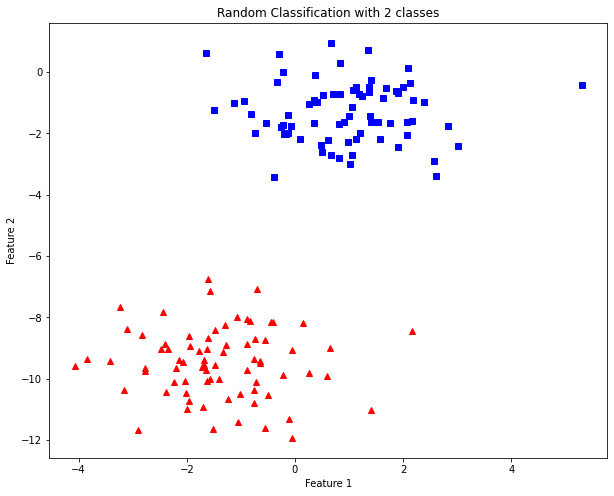

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,8))

plt.plot(X[:,0][y==0],X[:,1][y==0], 'r^')

plt.plot(X[:,0][y==1],X[:,1][y==1], 'bs')

# bs = blues square

plt.xlabel("Feature 1")

plt.ylabel("Feature 2")

plt.title("Random Classification with 2 classes")

In [5]:
def step_func(z):
    if(z>0):
        return 1.0
    else :
        return 0.0

In [6]:
import numpy as np

<h3 style = "color:green", align="center">Perceptron Learning Function</h3>

**This function is used to deploy perceptron learning.**


**The Logic of weights update rule will be implemented the body of the function**


**The Data variables used will be as follows :**

<pre>

X : Matrix of Input features
y : Column of labels / target.
lr: Learning Rate

epochs : No of Iterations
m  : No of training samples
n  : No of features

weights  : Connection Weights

n_miss_list : an array of miss-classified examples.

</pre>

In [7]:
def perceptron(X, y, lr, epochs):
    m, n = X.shape
    weights = np.zeros((n+1, 1))
    n_miss_list = []
    
    for each in range(epochs):
        n_miss = 0
        
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T, weights))             # .T : Transpose  , 
            
            if(np.squeeze(y_hat) - y[idx]) != 0:
                weights += lr * ((y[idx] - y_hat) * x_i)
                n_miss += 1
                
            n_miss_list.append(n_miss)
    return weights, n_miss_list

In [8]:
def plot_decision_boundary(X, weights):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -weights[1] / weights[2]
    c = -weights[0] / weights[2]
    
    x2 = m * x1 + c
    
    fig = plt.figure(figsize = (10,8))

    plt.plot(X[:,0][y==0],X[:,1][y==0], 'r^')

    plt.plot(X[:,0][y==1],X[:,1][y==1], 'bs')

    plt.xlabel("Feature 1")

    plt.ylabel("Feature 2")

    plt.title("Perceptron Learning")
    
    plt.plot(x1, x2, 'y-')
    

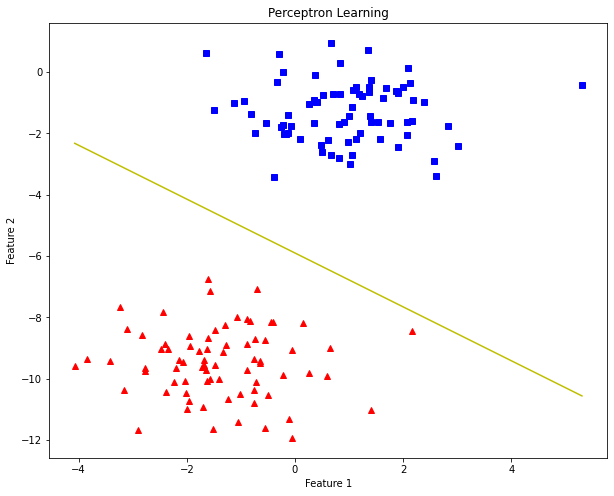

In [9]:
weights , miss_l = perceptron(X, y, 0.5, 100)

# 0.5 = learning rate

plot_decision_boundary(X, weights)